<a href="https://colab.research.google.com/github/surya81/crowd-counting-/blob/main/crowd_counting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
import os
if not os.path.exists('CSRNet-pytorch/'):
    !pip install -U scipy torch_snippets torch_summary
    !git clone https://github.com/sizhky/CSRNet-pytorch.git
    from google.colab import files
    files.upload() # upload kaggle.json
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !ls ~/.kaggle
    !chmod 600 /root/.kaggle/kaggle.json
    print('downloading data...')
    !kaggle datasets download -d tthien/shanghaitech-with-people-density-map/
    print('unzipping data...')
    !unzip shanghaitech-with-people-density-map

%cd CSRNet-pytorch
!ln -s ../shanghaitech_with_people_density_map
from torch_snippets import *
import h5py
from scipy import io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 3.2 MB/s 
     |████████████████████████████████| 948 kB 10.2 MB/s 
     |████████████████████████████████| 58 kB 8.3 MB/s 
     |████████████████████████████████| 235 kB 71.0 MB/s 
     |████████████████████████████████| 78 kB 9.9 MB/s 
     |████████████████████████████████| 51 kB 8.9 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=9f7f6c7906dc737b93dca87da73ca35d46a86b300adf7114229917be91733ceb
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

Cloning into 'CSRNet-pytorch'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Unpacking objects: 100% (92/92), done.


Streaming output truncated to the last 5000 lines.
  inflating: ShanghaiTech/part_B/test_data/images/IMG_200.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_201.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_202.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_203.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_204.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_205.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_206.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_207.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_208.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_209.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_21.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_210.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_211.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_212.jpg  
  inflating: ShanghaiTech/part_B/test_data/images/IMG_

In [2]:
"""root = '/content/shanghaitech_with_people_density_map/ShanghaiTech'
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_train,part_B_train]
path_sets_test = [part_A_test ,part_B_test]"""

"root = '/content/shanghaitech_with_people_density_map/ShanghaiTech'\npart_A_train = os.path.join(root,'part_A/train_data','images')\npart_A_test = os.path.join(root,'part_A/test_data','images')\npart_B_train = os.path.join(root,'part_B/train_data','images')\npart_B_test = os.path.join(root,'part_B/test_data','images')\npath_sets = [part_A_train,part_B_train]\npath_sets_test = [part_A_test ,part_B_test]"

In [3]:
""""import glob
image_folder = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        image_folder.append(img_path)

heatmap_folder = []
for path in path_sets:
    for heatmap_path in glob.glob(os.path.join(path, '*.h5')):
        heatmap_folder.append(heatmap_path)
gt_folder = []
for path in path_sets:
    for gt_path in glob.glob(os.path.join(path, '*.mat')):
        gt_folder.append(gt_path)"""

'"import glob\nimage_folder = []\nfor path in path_sets:\n    for img_path in glob.glob(os.path.join(path, \'*.jpg\')):\n        image_folder.append(img_path)\n\nheatmap_folder = []\nfor path in path_sets:\n    for heatmap_path in glob.glob(os.path.join(path, \'*.h5\')):\n        heatmap_folder.append(heatmap_path)\ngt_folder = []\nfor path in path_sets:\n    for gt_path in glob.glob(os.path.join(path, \'*.mat\')):\n        gt_folder.append(gt_path)'

In [4]:
"""image_path = [ fpath  for fpath in image_folder if fpath.split('/')[-1].startswith('IMG_37.jpg') ] 
image_path """



"image_path = [ fpath  for fpath in image_folder if fpath.split('/')[-1].startswith('IMG_37.jpg') ] \nimage_path "

In [5]:
""""import glob
image_folder_test = []
for path in path_sets_test:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        image_folder_test.append(img_path)

heatmap_folder_test = []
for path in path_sets_test:
    for heatmap_path in glob.glob(os.path.join(path, '*.h5')):
        heatmap_folder_test.append(heatmap_path)
gt_folder_test = []
for path in path_sets_test:
    for gt_path in glob.glob(os.path.join(path, '*.mat')):
        gt_folder_test.append(gt_path)"""

'"import glob\nimage_folder_test = []\nfor path in path_sets_test:\n    for img_path in glob.glob(os.path.join(path, \'*.jpg\')):\n        image_folder_test.append(img_path)\n\nheatmap_folder_test = []\nfor path in path_sets_test:\n    for heatmap_path in glob.glob(os.path.join(path, \'*.h5\')):\n        heatmap_folder_test.append(heatmap_path)\ngt_folder_test = []\nfor path in path_sets_test:\n    for gt_path in glob.glob(os.path.join(path, \'*.mat\')):\n        gt_folder_test.append(gt_path)'

In [6]:
part_B = Glob('/content/shanghaitech_with_people_density_map/ShanghaiTech/part_B/train_data');

image_folder = '/content/shanghaitech_with_people_density_map/ShanghaiTech/part_B/train_data/images'
heatmap_folder = '/content/shanghaitech_with_people_density_map/ShanghaiTech/part_B/train_data/ground-truth-h5'
gt_folder = '/content/shanghaitech_with_people_density_map/ShanghaiTech/part_B/train_data/ground-truth'

In [7]:
from torchvision.transforms.transforms import RandomVerticalFlip
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tfm = T.Compose([T.ToTensor(),
                 ]
)

In [8]:
"""class Crowds(Dataset):
  def __init__(self, image_folder,heatmap_folder,gt_folder):
    self.image_folder =image_folder
    self.heatmap_folder = heatmap_folder
    self.gt_folder = gt_folder 
  def __len__(self):
    return len(self.image_folder)
  def __getitem__(self, ix):
    image_path = [im for im in self.image_folder if im[-1].startswith('ix')]
    heatmap_path = [hm for hm in self.heatmap_folder if hm[-1].startswith('ix')]
    gt_path = [gt for gt in self.gt_folder if gt[-1].startswith('ix')]
    pts = io.loadmat(gt_path)
    pts = len(pts['image_info'][0,0][0,0][0])
    image = read(image_path, 1)
    with h5py.File(heatmap_path, 'r') as hf:
      gt = hf['density'][:]
    gt = resize(gt, 1/8)*64
    return image.copy(), gt.copy(), pts
  def collate_fn(self, batch):
    ims, gts, pts = list(zip(*batch))
    ims = torch.cat([tfm(im)[None] for im in ims]).to(device)
    gts = torch.cat([tfm(gt)[None] for gt in gts]).to(device)
    return ims, gts, torch.tensor(pts).to(device)
  def choose(self):
    return self[randint(len(self))]"""

"class Crowds(Dataset):\n  def __init__(self, image_folder,heatmap_folder,gt_folder):\n    self.image_folder =image_folder\n    self.heatmap_folder = heatmap_folder\n    self.gt_folder = gt_folder \n  def __len__(self):\n    return len(self.image_folder)\n  def __getitem__(self, ix):\n    image_path = [im for im in self.image_folder if im[-1].startswith('ix')]\n    heatmap_path = [hm for hm in self.heatmap_folder if hm[-1].startswith('ix')]\n    gt_path = [gt for gt in self.gt_folder if gt[-1].startswith('ix')]\n    pts = io.loadmat(gt_path)\n    pts = len(pts['image_info'][0,0][0,0][0])\n    image = read(image_path, 1)\n    with h5py.File(heatmap_path, 'r') as hf:\n      gt = hf['density'][:]\n    gt = resize(gt, 1/8)*64\n    return image.copy(), gt.copy(), pts\n  def collate_fn(self, batch):\n    ims, gts, pts = list(zip(*batch))\n    ims = torch.cat([tfm(im)[None] for im in ims]).to(device)\n    gts = torch.cat([tfm(gt)[None] for gt in gts]).to(device)\n    return ims, gts, torch.te

In [9]:
"""from sklearn.model_selection import train_test_split
trn_stems, val_stems = train_test_split(image_folder, random_state=10)

trn_ds = Crowds(image_folder,heatmap_folder,gt_folder)
val_ds = Crowds(image_folder_test,heatmap_folder_test,gt_folder_test)


trn_dl = DataLoader(trn_ds, batch_size=1, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, batch_size=1, shuffle=True, collate_fn=val_ds.collate_fn)"""


'from sklearn.model_selection import train_test_split\ntrn_stems, val_stems = train_test_split(image_folder, random_state=10)\n\ntrn_ds = Crowds(image_folder,heatmap_folder,gt_folder)\nval_ds = Crowds(image_folder_test,heatmap_folder_test,gt_folder_test)\n\n\ntrn_dl = DataLoader(trn_ds, batch_size=1, shuffle=True, collate_fn=trn_ds.collate_fn)\nval_dl = DataLoader(val_ds, batch_size=1, shuffle=True, collate_fn=val_ds.collate_fn)'

In [10]:
class Crowds(Dataset):
  def __init__(self, stems):
    self.stems = stems
  def __len__(self):
    return len(self.stems)
  def __getitem__(self, ix):
    _stem = self.stems[ix]
    image_path = f'{image_folder}/{_stem}.jpg'
    heatmap_path = f'{heatmap_folder}/{_stem}.h5'
    gt_path = f'{gt_folder}/GT_{_stem}.mat'
    pts = io.loadmat(gt_path)
    pts = len(pts['image_info'][0,0][0,0][0])
    image = read(image_path, 1)
    with h5py.File(heatmap_path, 'r') as hf:
      gt = hf['density'][:]
    gt = resize(gt, 1/8)*64
    return image.copy(), gt.copy(), pts
  def collate_fn(self, batch):
    ims, gts, pts = list(zip(*batch))
    ims = torch.cat([tfm(im)[None] for im in ims]).to(device)
    gts = torch.cat([tfm(gt)[None] for gt in gts]).to(device)
    return ims, gts, torch.tensor(pts).to(device)
  def choose(self):
    return self[randint(len(self))]

In [11]:
from sklearn.model_selection import train_test_split
trn_stems, val_stems = train_test_split(stems(Glob(image_folder)), random_state=10)

trn_ds = Crowds(trn_stems)
val_ds = Crowds(val_stems)

trn_dl = DataLoader(trn_ds, batch_size=1, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, batch_size=1, shuffle=True, collate_fn=val_ds.collate_fn)

In [12]:
import torch.nn as nn 
import torch 
from torchvision import models
from utils import save_net , load_net

In [13]:
def make_layers(cfg,in_channels= 3,batch_norm = False,dilation=False):
  if dilation : 
    d_rate = 2 
  else :
    d_rate = 1 
  layer = []
  for v in cfg :
    if v =='M' :
      layer +=[nn.MaxPool2d(kernel_size= 2,stride = 2)]
    else :
      conv2d = nn.Conv2d(in_channels, v , kernel_size = 3,padding= d_rate,dilation = d_rate)
      if batch_norm:
        layer += [conv2d,nn.BatchNorm2d(v),nn.RelU(inplace = True)]

      else : 
        layer += [conv2d,nn.ReLU(inplace = True )]
      in_channels = v
  return nn.Sequential(*layer)

In [14]:
class CSRNet(nn.Module):
  def __init__(self, load_weights=False):
    super(CSRNet, self).__init__()
    self.seen = 0
    self.frontend_feat = [64, 64, 'M', 128, 128, 'M',256,256, 256, 'M', 512, 512, 512]
    self.backend_feat = [512, 512, 512, 256, 128, 64]
    self.frontend = make_layers(self.frontend_feat)
    self.backend = make_layers(self.backend_feat,in_channels = 512,dilation = True)
    self.output_layer = nn.Conv2d(64, 1, kernel_size=1)
    if not load_weights:
      mod = models.vgg16(pretrained = True)
      self._initialize_weights()
      items = list(self.frontend.state_dict().items())
      _items = list(mod.state_dict().items())
      for i in range(len(self.frontend.state_dict().items())):
        items[i][1].data[:] = _items[i][1].data[:]
    
  def forward(self,x):
    x = self.frontend(x)
    x = self.backend(x)
    x = self.output_layer(x)
    return x

  def _initialize_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        nn.init.normal_(m.weight, std=0.01)
        if m.bias is not None:
          nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)

In [15]:
def train_batch(model, data, optimizer, criterion):
  model.train()
  optimizer.zero_grad()
  ims, gts, pts = data
  _gts = model(ims)
  loss = criterion(_gts, gts)
  loss.backward()
  optimizer.step()
  pts_loss = nn.L1Loss()(_gts.sum(), gts.sum())
  return loss.item(), pts_loss.item()

In [16]:
@torch.no_grad()
def validate_batch(model, data, criterion):
  model.eval()
  ims, gts, pts = data
  _gts = model(ims)
  loss = criterion(_gts, gts)
  pts_loss = nn.L1Loss()(_gts.sum(), gts.sum())
  return loss.item(), pts_loss.item()

In [17]:
model = CSRNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-6)
n_epochs = 20
log = Report(n_epochs)
for ex in range(n_epochs):
  N = len(trn_dl)
  for bx, data in enumerate(trn_dl):
    loss,pts_loss=train_batch(model, data, optimizer, criterion)
    log.record(ex+(bx+1)/N, trn_loss=loss,trn_pts_loss=pts_loss, end='\r')
  N = len(val_dl)
  for bx, data in enumerate(val_dl):
    loss, pts_loss = validate_batch(model, data, criterion)
    log.record(ex+(bx+1)/N, val_loss=loss,val_pts_loss=pts_loss, end='\r')
  log.report_avgs(ex+1)
  if ex == 10: optimizer = optim.Adam(model.parameters(), lr=1e-7)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

EPOCH: 1.000	trn_loss: 0.004	trn_pts_loss: 85.235	val_loss: 0.003	val_pts_loss: 78.492	(154.59s - 2937.27s remaining)
EPOCH: 2.000	trn_loss: 0.003	trn_pts_loss: 46.224	val_loss: 0.002	val_pts_loss: 26.833	(303.43s - 2730.84s remaining)
EPOCH: 3.000	trn_loss: 0.003	trn_pts_loss: 32.775	val_loss: 0.002	val_pts_loss: 24.648	(452.24s - 2562.67s remaining)
EPOCH: 4.000	trn_loss: 0.003	trn_pts_loss: 30.506	val_loss: 0.002	val_pts_loss: 28.530	(601.07s - 2404.29s remaining)
EPOCH: 5.000	trn_loss: 0.003	trn_pts_loss: 26.737	val_loss: 0.002	val_pts_loss: 24.891	(749.99s - 2249.97s remaining)
EPOCH: 6.000	trn_loss: 0.003	trn_pts_loss: 26.538	val_loss: 0.002	val_pts_loss: 28.682	(898.86s - 2097.34s remaining)
EPOCH: 7.000	trn_loss: 0.003	trn_pts_loss: 26.332	val_loss: 0.002	val_pts_loss: 22.388	(1047.72s - 1945.76s remaining)
EPOCH: 8.000	trn_loss: 0.003	trn_pts_loss: 28.094	val_loss: 0.002	val_pts_loss: 20.868	(1197.07s - 1795.60s remaining)
EPOCH: 9.000	trn_loss: 0.003	trn_pts_loss: 26.949	val_

In [18]:
from matplotlib import cm as c
from torchvision import datasets, transforms
from PIL import Image
transform=transforms.Compose([
transforms.ToTensor(),transforms.Normalize(\
mean=[0.485, 0.456, 0.406],\
std=[0.229, 0.224, 0.225]),\
])

Predicted Count :  102


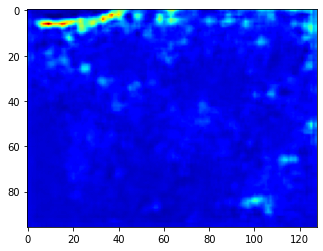

In [27]:
test_folder = 'shanghaitech_with_people_density_map/ShanghaiTech/part_B/test_data/'
imgs = Glob(f'{test_folder}/images')
f = choose(imgs)
img = transform(Image.open(f).convert('RGB')).to(device)

output = model(img[None])
print("Predicted Count : ", int(output.detach().cpu()\
.sum().numpy()))
temp = np.asarray(output.detach().cpu()\
.reshape(output.detach().cpu()\
.shape[2],output.detach()\
.cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()

Predicted Count :  45


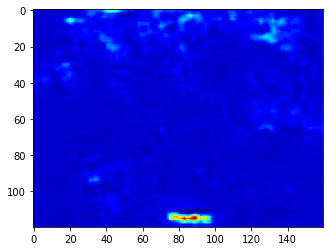

In [35]:
f = '/content/surya4.jpeg'
img = transform(Image.open(f).convert('RGB')).to(device)

output = model(img[None])
print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
